In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import utils, callbacks
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Add, Input, ZeroPadding2D, AveragePooling2D,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt
import cv2
from glob import glob
from numpy import floor
import random
from numpy.random import seed
seed(1)

ASL Alphabet for letter: S


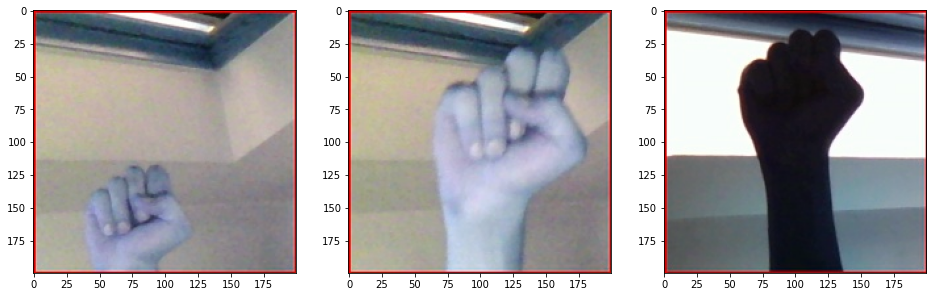

In [2]:
def plot_three_samples(letter):
    print("ASL Alphabet for letter: "+letter)
    base_path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents,3)
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(imgs[2]))
    
    return

plot_three_samples('S')

In [3]:
path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
path_test = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
target_size = (64,64)
target_dims = (64,64,3)
val_frac = 0.1
n_classes = 29
batch_size = 64

image_generator = ImageDataGenerator(samplewise_center = True, samplewise_std_normalization = True, validation_split=val_frac)

train_gen = image_generator.flow_from_directory(path, target_size=target_size, batch_size=batch_size, shuffle=True, subset='training')
val_gen = image_generator.flow_from_directory(path, target_size=target_size, subset='validation')

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [4]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
MOBILENET = tf.keras.Sequential()
MOBILENET.add(tf.keras.applications.mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape=(64, 64, 3)))
MOBILENET.add(Flatten())
MOBILENET.add(Dense(256, activation='relu'))
MOBILENET.add(Dense(29, activation='softmax'))

MOBILENET.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'] )
MOBILENET.summary()

17227776/17225924 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 2, 2, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1048832   
_________________________________________________________________
dense_1 (Dense)              (None, 29)                7453      
Total params: 4,285,149
Trainable params: 4,263,261
Non-trainable params: 21,888
_________________________________________________________________


In [5]:
mobilenet_model = MOBILENET.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
1224/1224 [==============================] - 367s 296ms/step - loss: 2.0435 - accuracy: 0.5281 - val_loss: 4.1210 - val_accuracy: 0.0345
Epoch 2/10
1224/1224 [==============================] - 137s 112ms/step - loss: 0.5991 - accuracy: 0.8124 - val_loss: 0.8762 - val_accuracy: 0.7476
Epoch 3/10
1224/1224 [==============================] - 140s 114ms/step - loss: 0.3795 - accuracy: 0.8814 - val_loss: 0.5804 - val_accuracy: 0.8691
Epoch 4/10
1224/1224 [==============================] - 139s 113ms/step - loss: 0.2655 - accuracy: 0.9203 - val_loss: 2.8300 - val_accuracy: 0.5616
Epoch 5/10
1224/1224 [==============================] - 138s 113ms/step - loss: 0.4852 - accuracy: 0.8572 - val_loss: 0.9814 - val_accuracy: 0.7500
Epoch 6/10
1224/1224 [==============================] - 139s 113ms/step - loss: 0.3789 - accuracy: 0.8838 - val_loss: 0.7253 - val_accuracy: 0.7903
Epoch 7/10
1224/1224 [==============================] - 141s 115ms/step - loss: 0.3933 - accuracy: 0.8847 - val_